In [1]:
import numpy as np
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [2]:
def get_sublist(subDir):
    """ Lists all directories in a main directories of all subjects to create a subject list. Note that this is BIDS format specific (assumes all subject directories begin "sub-xxx". Could be modified.
 Return: subject list """
    sublist = []
    for subnum in np.sort(os.listdir(subDir)): 
        if len(subnum) == 3: 
            if not 'html' in subnum: 
                sublist.append(subnum) 
    return sublist

In [3]:
physioPath = '/Users/Eichenbaum/HWNI/Experiments/nScout/data/physio'

sublist = get_sublist(physioPath)

In [4]:
# Skip 040 047 063 071 077
# 087 BR good, but HR only run 2
# 088 Only run 2 of HR/BR was saved

In [5]:
# First step is extract Instantaneous Measure of HR from both runs
meanBR_arr = np.ones((len(sublist)-5, 2)) * np.nan
meanHR_arr = np.ones((len(sublist)-5, 2)) * np.nan

varBR_arr = np.ones((len(sublist)-5, 2)) * np.nan
varHR_arr = np.ones((len(sublist)-5, 2)) * np.nan

rmssd_arr = np.ones((len(sublist)-5, 2)) * np.nan


tmp = 0
for sub in sublist:

    subpath = '%s/%s' %(physioPath, sub)
#     print(sub, tmp, subpath)
    
    if sub in ['040', '047', '063', '071', '077']:
        continue

    if sub in ['087']:
        BR1 = np.loadtxt('%s/%s/BreathingRate_InstantaneousDownsampled_run-001.txt' %(physioPath, sub))
        BR2 = np.loadtxt('%s/%s/BreathingRate_InstantaneousDownsampled_run-002.txt' %(physioPath, sub))
        BR_arr = np.concatenate((BR1, BR2))
#         print('%s BR = ' %(sub), np.mean(BR_arr))
        meanBR_arr[tmp, :] = [int(sub), np.mean(BR_arr)] 
        varBR_arr[tmp, :] = [int(sub), np.std(BR_arr)] 
        
        HR2 = np.loadtxt('%s/%s/HeartRate_InstantaneousDownsampled_run-002.txt' %(physioPath, sub))
        HR_arr = HR2
#         print('%s HR = ' %(sub), np.mean(HR_arr))
        meanHR_arr[tmp, :] = [int(sub), np.mean(HR_arr)] 
        varHR_arr[tmp, :] = [int(sub), np.std(HR_arr)] 
        
        ## Calculate HRV (RMSSD) from heart rate data
        rmssd2_raw = np.loadtxt('%s/%s/HeartRate_InterBeatInterval_run-002.txt' %(physioPath, sub))

        ### Computing Root Mean Square (of) Successive Differences ###
        nIBI = np.shape(rmssd2_raw)[0]
        rmssd_IBIdiffs = np.zeros((nIBI-1)) * np.nan
        for idx, beatTime in enumerate(rmssd2_raw.astype(int)):
            if idx == nIBI-1:
                break
            rmssd_IBIdiffs[idx] = np.subtract(rmssd2_raw[idx+1], rmssd2_raw[idx])
        rmssd_IBIdiffs_sq = np.square(rmssd_IBIdiffs)    
        rmssd_arr[tmp, :] = [int(sub), np.sqrt(np.mean(rmssd_IBIdiffs_sq))]
        
#         print(np.sqrt(np.mean(rmssd_IBIdiffs_sq)))
           
    elif sub in ['088']:
        BR1 = np.loadtxt('%s/%s/BreathingRate_InstantaneousDownsampled_run-001.txt' %(physioPath, sub))
        BR_arr = BR1
#         print('%s BR = ' %(sub), np.mean(BR_arr))
        meanBR_arr[tmp, :] = [int(sub), np.mean(BR_arr)] 
        varBR_arr[tmp, :] = [int(sub), np.std(BR_arr)] 
        
        HR1 = np.loadtxt('%s/%s/HeartRate_InstantaneousDownsampled_run-001.txt' %(physioPath, sub))
        HR_arr = HR1
#         print('%s HR = ' %(sub), np.mean(HR_arr))
        meanHR_arr[tmp, :] = [int(sub), np.mean(HR_arr)] 
        varHR_arr[tmp, :] = [int(sub), np.std(HR_arr)] 
        
        ## Calculate HRV (RMSSD) from heart rate data
        rmssd2_raw = np.loadtxt('%s/%s/HeartRate_InterBeatInterval_run-001.txt' %(physioPath, sub))
        
        ### Computing Root Mean Square (of) Successive Differences ###
        nIBI = np.shape(rmssd2_raw)[0]
        rmssd_IBIdiffs = np.zeros((nIBI-1)) * np.nan
        for idx, beatTime in enumerate(rmssd2_raw.astype(int)):
            if idx == nIBI-1:
                break
            rmssd_IBIdiffs[idx] = np.subtract(rmssd2_raw[idx+1], rmssd2_raw[idx])
        rmssd_IBIdiffs_sq = np.square(rmssd_IBIdiffs)    
        rmssd_arr[tmp, :] = [int(sub), np.sqrt(np.mean(rmssd_IBIdiffs_sq))]
                
    elif sub not in ['087', '088']: #else:
        BR1 = np.loadtxt('%s/%s/BreathingRate_InstantaneousDownsampled_run-001.txt' %(physioPath, sub))
        BR2 = np.loadtxt('%s/%s/BreathingRate_InstantaneousDownsampled_run-002.txt' %(physioPath, sub))
        BR_arr = np.concatenate((BR1, BR2))
#         print('%s BR = ' %(sub), np.mean(BR_arr))
        meanBR_arr[tmp, :] = [int(sub), np.mean(BR_arr)] 
        varBR_arr[tmp, :] = [int(sub), np.std(BR_arr)] 
        
        HR1 = np.loadtxt('%s/%s/HeartRate_InstantaneousDownsampled_run-001.txt' %(physioPath, sub))
        HR2 = np.loadtxt('%s/%s/HeartRate_InstantaneousDownsampled_run-002.txt' %(physioPath, sub))
        HR_arr = np.concatenate((HR1, HR2))
#         print('%s HR = ' %(sub), np.mean(HR_arr))
        meanHR_arr[tmp, :] = [int(sub), np.mean(HR_arr)] 
        varHR_arr[tmp, :] = [int(sub), np.std(HR_arr)] 
    
    
        ## Load up the Beat-to-Beat intervals from heart rate data
        rmssd1_raw = np.loadtxt('%s/%s/HeartRate_InterBeatInterval_run-001.txt' %(physioPath, sub))
        rmssd2_raw = np.loadtxt('%s/%s/HeartRate_InterBeatInterval_run-002.txt' %(physioPath, sub))
        full_rmssd_raw = np.concatenate((rmssd1_raw, rmssd2_raw))

        ### Computing Root Mean Square (of) Successive Differences ###
        nIBI = np.shape(full_rmssd_raw)[0]
        
        rmssd_IBIdiffs = np.zeros((nIBI-1)) * np.nan
        
        for idx, beatTime in enumerate(full_rmssd_raw.astype(int)):
            if idx == nIBI-1:
                break
            rmssd_IBIdiffs[idx] = np.subtract(full_rmssd_raw[idx+1], full_rmssd_raw[idx])
        
        rmssd_IBIdiffs_sq = np.square(rmssd_IBIdiffs)
                
        rmssd_arr[tmp, :] = [int(sub), np.sqrt(np.mean(rmssd_IBIdiffs_sq))]
        
    
    tmp += 1
    
# np.savetxt('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/meanBR_arr_recalc.txt', meanBR_arr, fmt='%1.8f')
# np.savetxt('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/meanHR_arr_recalc.txt', meanHR_arr, fmt='%1.8f')
# np.savetxt('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/varBR_arr_recalc.txt', varBR_arr, fmt='%1.8f')
# np.savetxt('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/varHR_arr_recalc.txt', varHR_arr, fmt='%1.8f')
# np.savetxt('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/RMSSD_arr.txt', rmssd_arr, fmt='%1.8f')

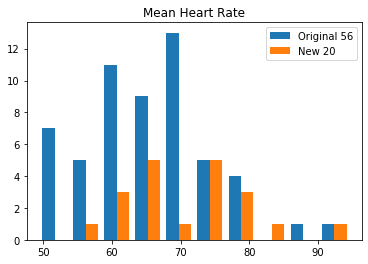

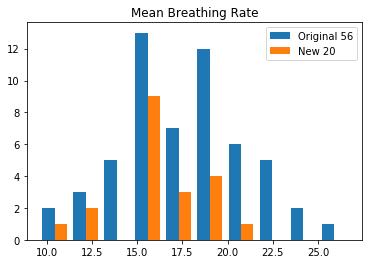

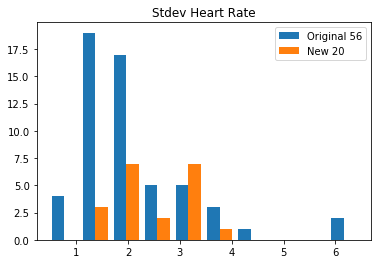

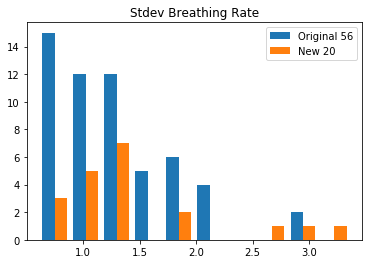

In [6]:
plt.hist([meanHR_arr[:56 ,1], meanHR_arr[56: ,1]])
plt.title('Mean Heart Rate')
plt.legend(['Original 56', 'New 20'])
plt.show()

plt.hist([meanBR_arr[:56 ,1], meanBR_arr[56: ,1]])
plt.title('Mean Breathing Rate')
plt.legend(['Original 56', 'New 20'])
plt.show()

plt.hist([varHR_arr[:56 ,1], varHR_arr[56: ,1]])
plt.title('Stdev Heart Rate')
plt.legend(['Original 56', 'New 20'])
plt.show()

plt.hist([varBR_arr[:56 ,1], varBR_arr[56: ,1]])
plt.title('Stdev Breathing Rate')
plt.legend(['Original 56', 'New 20'])
plt.show()

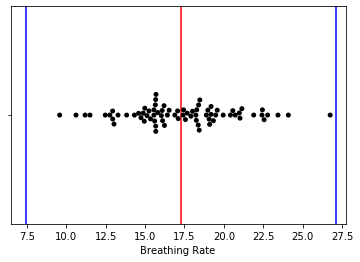

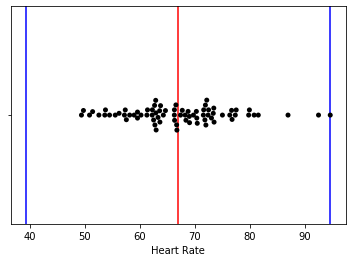

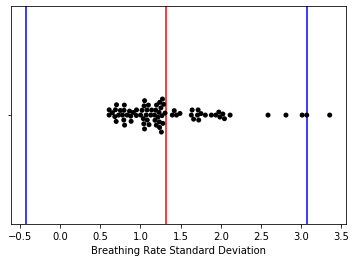

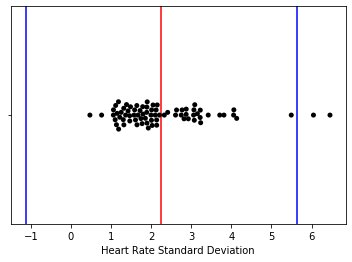

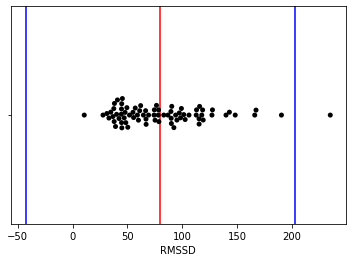

In [7]:
## Look for outliers in Physio metrics

meanBR = np.loadtxt('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/meanBR_arr_recalc.txt')
meanHR = np.loadtxt('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/meanHR_arr_recalc.txt')
varBR = np.loadtxt('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/varBR_arr_recalc.txt')
varHR = np.loadtxt('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/varHR_arr_recalc.txt')
RMSSD = np.loadtxt('/Users/Eichenbaum/HWNI/Experiments/nScout/data/derivatives/group-level/RMSSD_arr.txt')

## Build dataframe
phyDF = pd.DataFrame(data = np.vstack([meanBR[:,1], meanHR[:,1], varBR[:,1], varHR[:,1], RMSSD[:,1]]).T,
                     columns = ['Mean BR', 'Mean HR', 'BR Std.', 'HR Std.', 'RMSSD'])

## Mean Breathing Rate plot
sns.swarmplot(meanBR[:,1], color = 'black')
plt.axvline(x=np.mean(meanBR[:,1]), ymin=0, ymax=2, color = 'r')
plt.axvline(x= np.mean(meanBR[:,1]) - np.multiply(np.std(meanBR[:,1]),3), ymin=0, ymax=2, color = 'b')
plt.axvline(x= np.mean(meanBR[:,1]) + np.multiply(np.std(meanBR[:,1]),3), ymin=0, ymax=2, color = 'b')
plt.xlabel('Breathing Rate')
plt.show()

## Mean Heart Rate plot
sns.swarmplot(meanHR[:,1], color = 'black')
plt.axvline(x=np.mean(meanHR[:,1]), ymin=0, ymax=2, color = 'r')
plt.axvline(x= np.mean(meanHR[:,1]) - np.multiply(np.std(meanHR[:,1]),3), ymin=0, ymax=2, color = 'b')
plt.axvline(x= np.mean(meanHR[:,1]) + np.multiply(np.std(meanHR[:,1]),3), ymin=0, ymax=2, color = 'b')
plt.xlabel('Heart Rate')
plt.show()

## Breathing Rate Var plot
sns.swarmplot(varBR[:,1], color = 'black')
plt.axvline(x=np.mean(varBR[:,1]), ymin=0, ymax=2, color = 'r')
plt.axvline(x= np.mean(varBR[:,1]) - np.multiply(np.std(varBR[:,1]),3), ymin=0, ymax=2, color = 'b')
plt.axvline(x= np.mean(varBR[:,1]) + np.multiply(np.std(varBR[:,1]),3), ymin=0, ymax=2, color = 'b')
plt.xlabel('Breathing Rate Standard Deviation')
plt.show()

## Heart Rate Var plot
sns.swarmplot(varHR[:,1], color = 'black')
plt.axvline(x=np.mean(varHR[:,1]), ymin=0, ymax=2, color = 'r')
plt.axvline(x= np.mean(varHR[:,1]) - np.multiply(np.std(varHR[:,1]),3), ymin=0, ymax=2, color = 'b')
plt.axvline(x= np.mean(varHR[:,1]) + np.multiply(np.std(varHR[:,1]),3), ymin=0, ymax=2, color = 'b')
plt.xlabel('Heart Rate Standard Deviation')
plt.show()

## RMSSD plot
sns.swarmplot(RMSSD[:,1], color = 'black')
plt.axvline(x=np.mean(RMSSD[:,1]), ymin=0, ymax=2, color = 'r')
plt.axvline(x= np.mean(RMSSD[:,1]) - np.multiply(np.std(RMSSD[:,1]),3), ymin=0, ymax=2, color = 'b')
plt.axvline(x= np.mean(RMSSD[:,1]) + np.multiply(np.std(RMSSD[:,1]),3), ymin=0, ymax=2, color = 'b')
plt.xlabel('RMSSD')
plt.show()